A/B testing plays a critical role in decision-making processes across various industries. A/B testing is essentially a method of comparing and testing the effectiveness and benefits of two different business strategies. It can be considered as an experiment where two or more variants are tested for a set period of time and then the experiment results are evaluated to find the strategy that works best. Running A/B testing before fully committing to a single option helps businesses take the guesswork out of their decision-making processes and saves valuable resources, such as time and capital, that could have been wasted if the chosen strategy did not work.   

We create and test two or more versions of marketing strategies for their effectiveness in achieving out marketing goal. Consider a case where your goal is to improve marketing email open rates. If your hypothesis is that email subject line B will result in higher open rates than email subject line A, then you would run an A/B test with these two subject lines. You will randomly select half of the users and send out marketing emails with subject line A. The other half of randomly selected users will receive emails with subject line B. You will run this test for a predetermined period of time (which could be one week, two weeks, or one month, for instance) or until a predetermined number of users receive the two versions of emails (which is a minimum of 1,000 users to receive each version of the subject line). Once your tests are complete, then you analyze and evaluate the experiment results. When analyzing the results, you will need to check whether there is a statistically significant difference between the results of the two versions. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

For instance, you can run A/B testing on your advertisements on social media. You can have two or more variants of your ads and run A/B tests to see which variation works better for click-through rates or conversion rates. As another example, you can use A/B testing to test whether product recommendations on your web page result in higher purchase rates. If you have built a different version of your product recommendation algorithm, then you can use and expose the initial version of your product recommendation algorithm to some randomly selected users and the second version to some other randomly selected users. You can gather the A/B test results and evaluate which version of your product recommendation algorithm helps you bring in more revenue.   


There are two important statistics in a **t-test the t-value** and **p-value**. The t-value measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference there is between the two groups. On the other hand, the p-value measures the probability that the results would occur by chance. The smaller the p-value is, the more statistically significant difference there will be between the two groups. The equation to compute the t-value is as follows:

## Load Data

In [5]:
df = pd.read_csv('./Downloads/data/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.shape

(548, 7)

In [6]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


### Data Analysis   

Total Sales


In [7]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

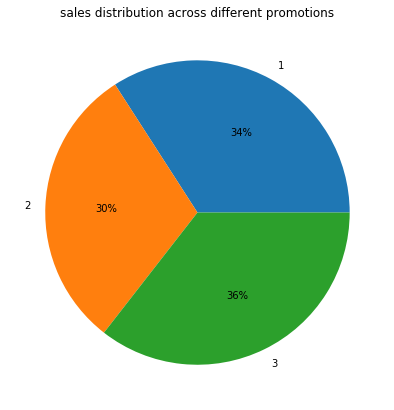

In [8]:
ax = df.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')

plt.show()

#### - Market Size

In [9]:
df.groupby('MarketSize').count()['MarketID']

MarketSize
Large     168
Medium    320
Small      60
Name: MarketID, dtype: int64

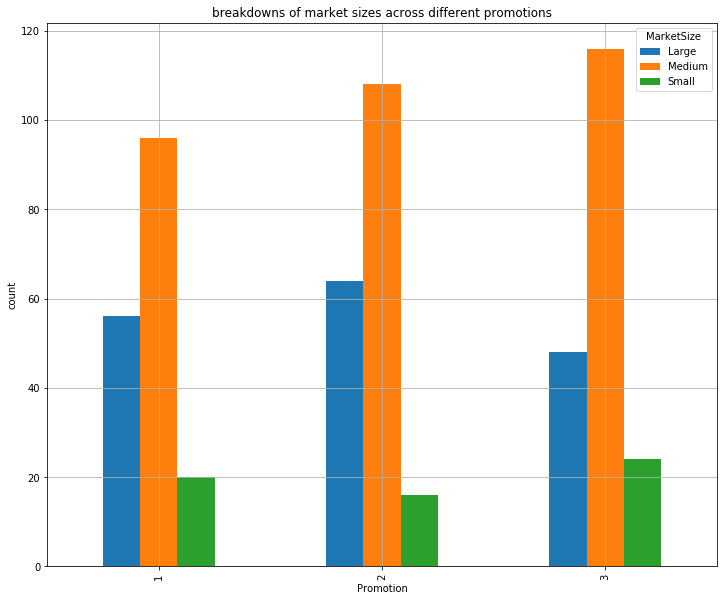

In [10]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).count()[
    'MarketID'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

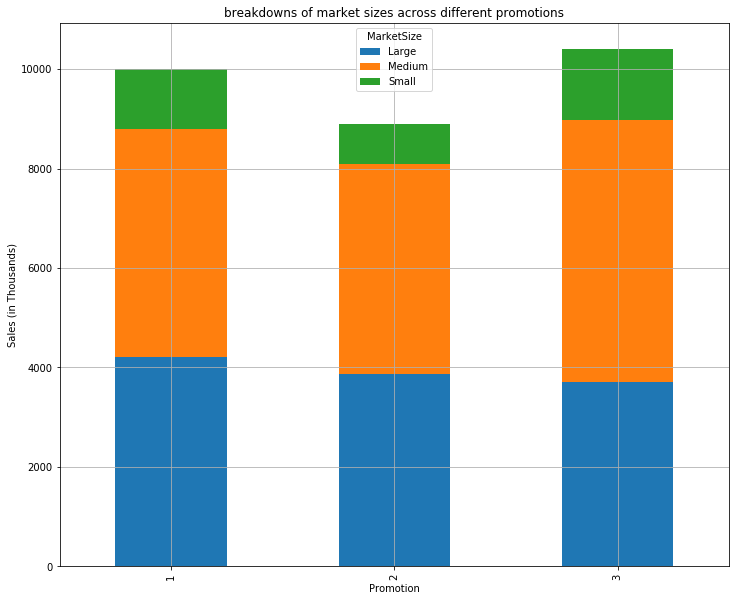

In [11]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

#### - Store Age

In [12]:
df['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

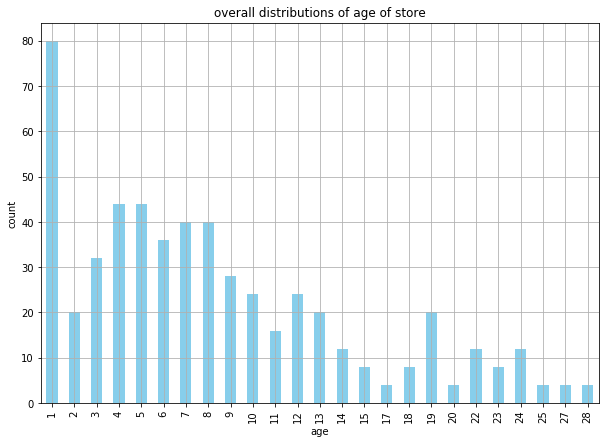

In [13]:
ax = df.groupby(
    'AgeOfStore'
).count()[
    'MarketID'
].plot(
    kind='bar', 
    color='skyblue',
    figsize=(10,7),
    grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

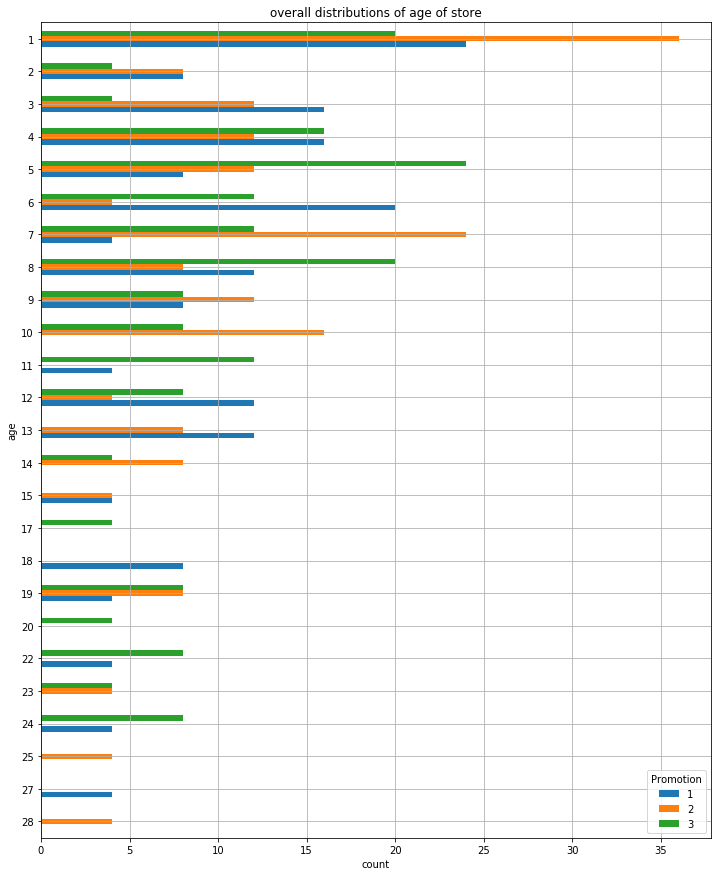

In [14]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh', 
    figsize=(12,15),
    grid=True
)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [15]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


#### - Week Number

In [19]:
df.groupby('week').count()['MarketID']

week
1    137
2    137
3    137
4    137
Name: MarketID, dtype: int64

In [20]:
df.groupby(['Promotion', 'week']).count()['MarketID']

Promotion  week
1          1       43
           2       43
           3       43
           4       43
2          1       47
           2       47
           3       47
           4       47
3          1       47
           2       47
           3       47
           4       47
Name: MarketID, dtype: int64

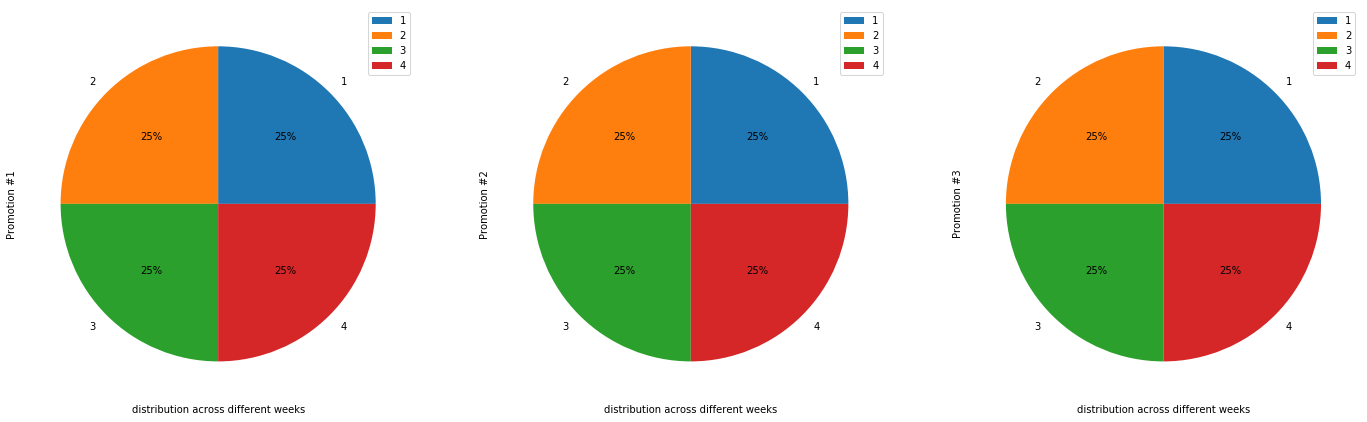

In [22]:
ax1, ax2, ax3 = df.groupby(
    ['week', 'Promotion']
).count()[
    'MarketID'
].unstack('Promotion').plot.pie(
    subplots=True,
    figsize=(24, 8),
    autopct='%1.0f%%'
)

ax1.set_ylabel('Promotion #1')
ax2.set_ylabel('Promotion #2')
ax3.set_ylabel('Promotion #3')

ax1.set_xlabel('distribution across different weeks')
ax2.set_xlabel('distribution across different weeks')
ax3.set_xlabel('distribution across different weeks')

plt.show()

## Statistical Significance

In [23]:
import numpy as np
from scipy import stats

#### - t-test

In [24]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [25]:
stds = df.groupby('Promotion').std()['SalesInThousands']
stds

Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

In [26]:
ns = df.groupby('Promotion').count()['SalesInThousands']
ns

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

#### - Promotion 1 vs. 2

In [27]:
t_1_vs_2 = (
    means.iloc[0] - means.iloc[1]
)/ np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1])
)

df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2

In [28]:
t_1_vs_2

6.427528670907475

In [29]:
p_1_vs_2

4.143296816749853e-10

#### - using scipy

In [30]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)

In [31]:
t

6.42752867090748

In [32]:
p

4.2903687179871785e-10

#### - Promotion 1 vs. 3

In [33]:
t_1_vs_3 = (
    means.iloc[0] - means.iloc[2]
)/ np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[2]**2/ns.iloc[2])
)

df_1_vs_3 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_3 = (1 - stats.t.cdf(t_1_vs_3, df=df_1_vs_3))*2

In [34]:
t_1_vs_3

1.5560224307759116

In [35]:
p_1_vs_3

0.12058631176433687

#### - using scipy

In [36]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

In [37]:
t

1.5560224307758634

In [38]:
p

0.12059147742229478